go in depth on how your topic works, how it is implemented, some changes you can make, and how it is important to have in the game

## Game Over

## Transitions

```js
async transitionToLevel(newLevel) {
        this.inTransition = true;

        // Destroy existing game objects
        GameEnv.destroy();

        // Load GameLevel objects
        if (GameEnv.currentLevel !== newLevel) {
            GameEnv.claimedCoinIds = [];
        }
        await newLevel.load();
        GameEnv.currentLevel = newLevel;

        // Update invert property
        GameEnv.setInvert();
        
        // Trigger a resize to redraw canvas elements
        window.dispatchEvent(new Event('resize'));

        this.inTransition = false;
    },
```
### How transitionToLevel works

The way the game switches your level is found GameConstrol.js (210) wich is activated after colliding with the end point on a map using the "transitionToLevel()" function to change levels. At the begining of the function it removes the current level by running GameEnv.destroy() then soon after it resets the collected coins. then it will load the next level with the .load function. then it finsihes this off by setting up the screen wand winsow size


GameLevel.js(36)
```js
async load() {
        Socket.removeAllListeners("stateUpdate") //reset Socket Connections
        Socket.removeAllListeners("disconnection")
        Socket.removeAllListeners("leaderboardUpdate")
        // Socket.createListener("leaderboardUpdate",this.handleLeaderboardUpdates)
        // Socket.createListener("stateUpdate",this.handleStateUpdates)
        Socket.createListener("disconnection",this.handleSocketDisconnect)
        try {
            var objFile = null;
            for (const obj of this.gameObjects) {
                if (obj.data.file) {
                    // Load the image for the game object.
                    objFile = obj.data.file; 
                    console.log(objFile);
                    obj.image = await this.loadImage(obj.data.file);
                    // Create a new canvas for the game object.
                    const canvas = document.createElement("canvas");
                    canvas.id = obj.id;
                    document.querySelector("#canvasContainer").appendChild(canvas);
                    // Create a new instance of the game object.
                    new obj.class(canvas, obj.image, obj.data, obj.xPercentage, obj.yPercentage, obj.name, obj.minPosition);
                }
            }
        } catch (error) {
            console.error('Failed to load one or more GameLevel objects: ' + objFile, error);
        }
    }

```
### How Level loading works

when the load function is ran it will go through every object in a levels object list. With every object it will gather its properties then apply it to the screen creating the objects you see in the level. It will do this for all the objects that is in the levels object array.

### Possible Changes
Instead of checking the level transition every frame you can optimize this so it will only run when reaching the finish of the level allowing for less code being ran and allowing future changes to how levels end giving room to add requirements needed to finish levels

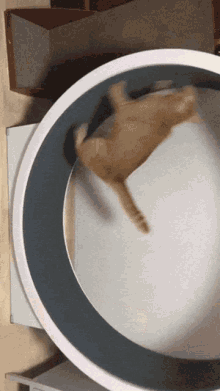

## Leaderboard

In [ ]:
const levelKey = "level-1-leaderboard"; // Change this key for different levels
        const maxEntries = 10; // Maximum number of entries on the leaderboard

        // Load the leaderboard from localStorage
        function loadLeaderboard() {
            const leaderboard = JSON.parse(localStorage.getItem(levelKey)) || [];
            return leaderboard;
        }

        // Save the leaderboard to localStorage
        function saveLeaderboard(leaderboard) {
            localStorage.setItem(levelKey, JSON.stringify(leaderboard));
        }

        // Update the leaderboard UI
        function updateLeaderboardUI() {
            const leaderboard = loadLeaderboard();
            const leaderboardList = document.getElementById("leaderboard-list");
            leaderboardList.innerHTML = "";

            leaderboard.forEach((entry, index) => {
                const listItem = document.createElement("li");
                listItem.textContent = `${index + 1}. ${entry.name} - ${entry.score}`;
                leaderboardList.appendChild(listItem);
            });
        }

        // Add a new score to the leaderboard
        function addScore(name, score) {
            const leaderboard = loadLeaderboard();
            leaderboard.push({ name, score });

            // Sort by score (descending) and keep only the top entries
            leaderboard.sort((a, b) => b.score - a.score);
            if (leaderboard.length > maxEntries) {
                leaderboard.length = maxEntries;
            }

            saveLeaderboard(leaderboard);
            updateLeaderboardUI();
        }

        // Event listener for submitting a new score
        document.getElementById("submit-score").addEventListener("click", () => {
            const name = document.getElementById("player-name").value.trim();
            const score = parseInt(document.getElementById("player-score").value, 10);

            if (name && !isNaN(score)) {
                addScore(name, score);
                document.getElementById("player-name").value = "";
                document.getElementById("player-score").value = "";
            } else {
                alert("Please enter a valid name and score.");
            }
        });

        // Initialize the leaderboard UI on page load
        updateLeaderboardUI();
    </script>
</body>
</html>


The code above deomonstrated how we can locally incorporate a local stirage leaderboard for user data for every specififc level, and we can incorporate this code into each GameSetter.js file for every level!!

Features:
Local Storage: The leaderboard data is stored in the browser's local storage under a key specific to the level.
Sorting: Scores are sorted in descending order to show the highest scores at the top.
Limit Entries: The leaderboard displays a maximum of maxEntries scores.
Dynamic Updates: The leaderboard updates dynamically whenever a new score is submitted.
How to Use:
Copy and paste the code into an index.html file.
Open the file in your browser.
Enter a player's name and score, and click "Submit Score."
The leaderboard will display the top scores for the specific game level.
You can change the levelKey value (e.g., "level-2-leaderboard") for different game levels.

Currently, the leaderboard is very laggy and doesnt really display user scores or any highs scores very well, I want to scale this idea and also have the highest scores for every local user as well for the current level that they are playing.